In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading in our data
data = pd.read_csv("AC_data.csv",index_col=0) # use date column as index

In [3]:
#rename the date column
data.index.rename('Date',inplace=True)  # rename the index as date

In [4]:
data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


# About the data

- It has data from 1st August 2019 to 30th September 2019
- The data has been stored in every minute interval 
- It contains information about 18 different AC and their power usage for a hotel in Gurgaon

In [5]:
#create a copy of our data
data_copy = data.copy()

In [6]:
data_copy.index

Index(['2019-08-01 00:00:00', '2019-08-01 00:01:00', '2019-08-01 00:02:00',
       '2019-08-01 00:03:00', '2019-08-01 00:04:00', '2019-08-01 00:05:00',
       '2019-08-01 00:06:00', '2019-08-01 00:07:00', '2019-08-01 00:08:00',
       '2019-08-01 00:09:00',
       ...
       '2019-09-30 23:50:00', '2019-09-30 23:51:00', '2019-09-30 23:52:00',
       '2019-09-30 23:53:00', '2019-09-30 23:54:00', '2019-09-30 23:55:00',
       '2019-09-30 23:56:00', '2019-09-30 23:57:00', '2019-09-30 23:58:00',
       '2019-09-30 23:59:00'],
      dtype='object', name='Date', length=87840)

Currently our index is an object , we will convert it into datetime for easier manipulation

In [7]:
data_copy.index = pd.to_datetime(data_copy.index , format= '%Y-%m-%d %H:%M:%S')

In [8]:
data_copy.index

DatetimeIndex(['2019-08-01 00:00:00', '2019-08-01 00:01:00',
               '2019-08-01 00:02:00', '2019-08-01 00:03:00',
               '2019-08-01 00:04:00', '2019-08-01 00:05:00',
               '2019-08-01 00:06:00', '2019-08-01 00:07:00',
               '2019-08-01 00:08:00', '2019-08-01 00:09:00',
               ...
               '2019-09-30 23:50:00', '2019-09-30 23:51:00',
               '2019-09-30 23:52:00', '2019-09-30 23:53:00',
               '2019-09-30 23:54:00', '2019-09-30 23:55:00',
               '2019-09-30 23:56:00', '2019-09-30 23:57:00',
               '2019-09-30 23:58:00', '2019-09-30 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=87840, freq=None)

We note that although dates are now in correct format , they don't have a specific frequency , we will resolve this by creating a new index which ranges from min value to max value at 1 min interval each

In [9]:
new_index = pd.date_range(data_copy.index.min(),data_copy.index.max(),freq='min')

In [10]:
data_copy = data_copy.reindex(new_index)

Next we have to deal with the missing values , it looks like the data has been collected at every 2 min interval instead of 1 , we can use interpolation to fill these values instead of dropping them

In [11]:
data_copy.interpolate(method='time',inplace=True)

Next to analyze our trends we calculate the total power consumption of ac in the hotel

In [12]:
data_copy['total']= data_copy.sum(axis=1)

# Q1.) Trends in data

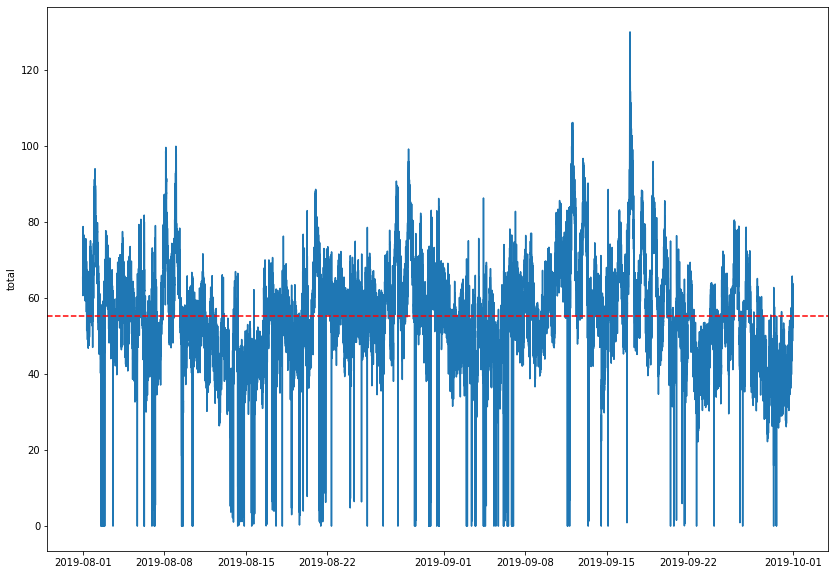

In [13]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_copy.index,y='total',data=data_copy)
ax=plt.gca()
ax.axhline(data_copy['total'].mean(),color='red',linestyle='--')

Looking at the raw data it is difficult to interpret anything as their is too much noise 
Hence we first aggregrate it into higher frequencies 

In [14]:
data_hourly = data_copy.resample('h').sum() #aggregrate data for every hour
data_daily = data_copy.resample('D').sum() # aggregrate on daily basis

# Hourly Trend

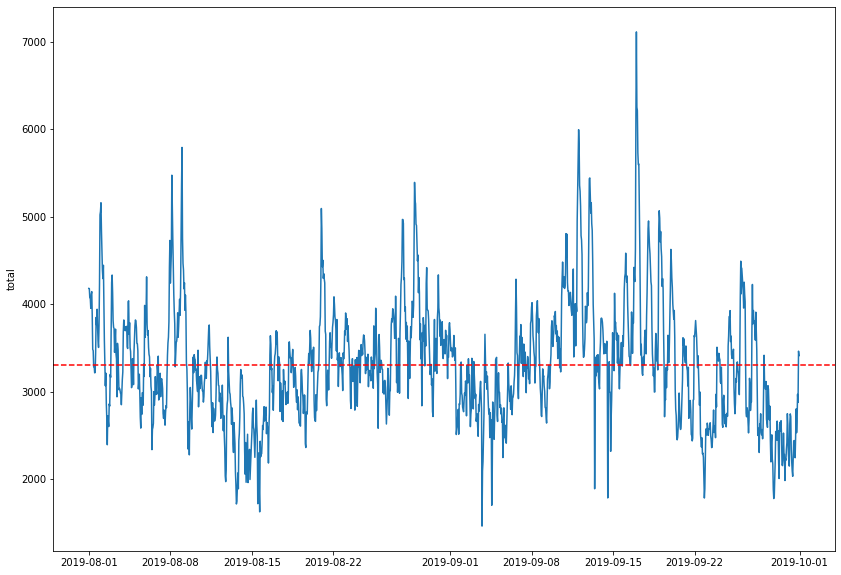

In [15]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_hourly.index,y='total',data=data_hourly)
ax=plt.gca()
ax.axhline(data_hourly['total'].mean(),color='red',linestyle='--')

# Daily Trend

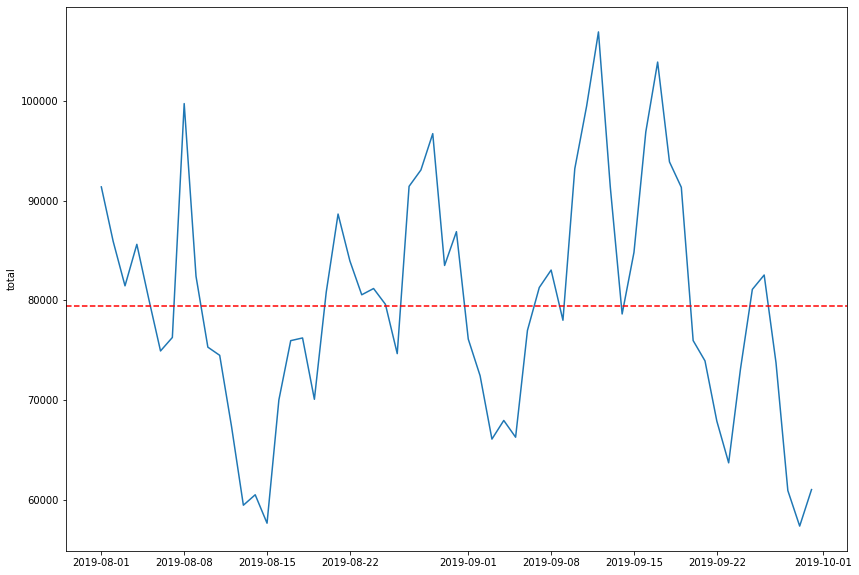

In [16]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_daily.index,y='total',data=data_daily)
ax=plt.gca()
ax.axhline(data_daily['total'].mean(),color='red',linestyle='--')

Lets segment our data and look into the first week to find some more underlying trends 

<AxesSubplot:ylabel='total'>

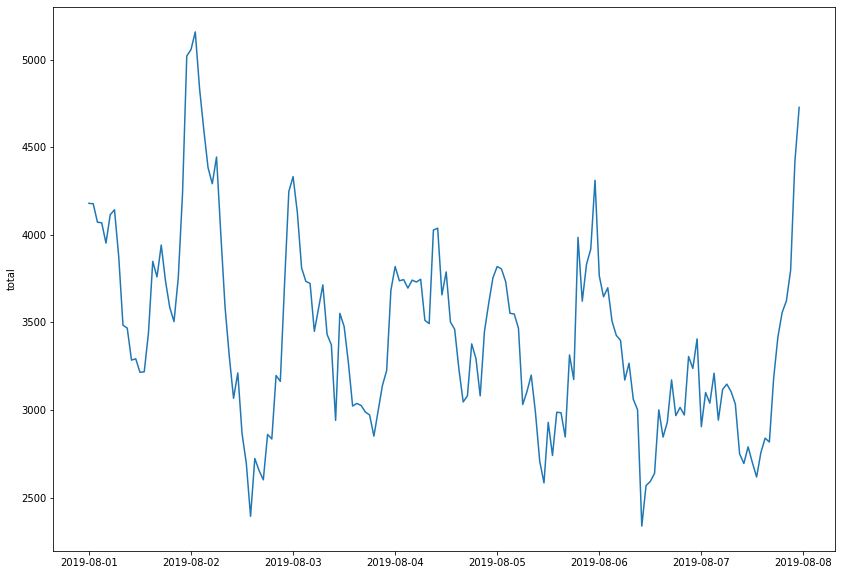

In [17]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_hourly['2019-08-01':'2019-08-07'].index,y='total',data=data_hourly['2019-08-01':'2019-08-07'])

<AxesSubplot:ylabel='total'>

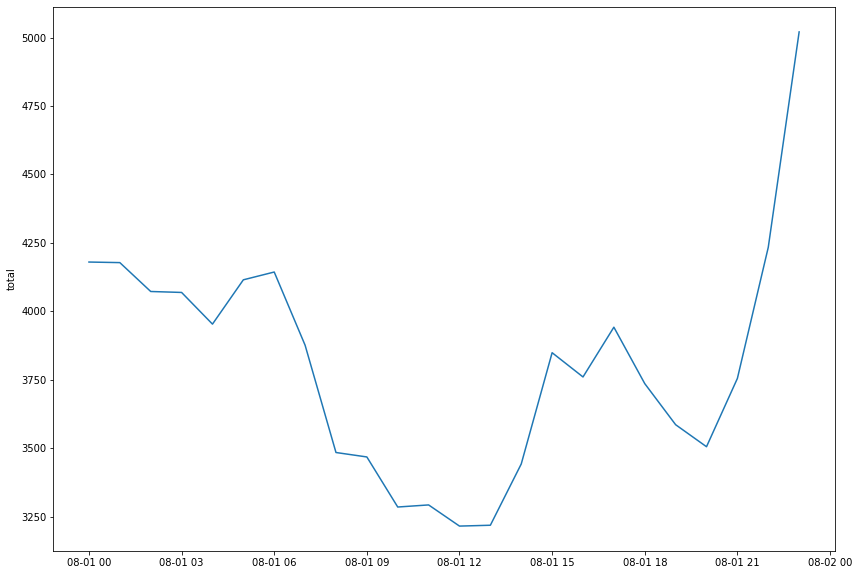

In [18]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_hourly['2019-08-01'].index,y='total',data=data_hourly['2019-08-01'])

# Important observations

- There seems to be a pattern in daily usage as the power consumption generally goes down in the morning between 8-12 and then starts peaking up again as the day goes by 
- The highest usage is usually during the nights
- There also seems to be a trend on weekly basis with power consumption fluctuating every alternative week.

We will look into a bit more depth by analyzing the power consumption for each month seperately

# August

In [19]:
data_aug = data_copy['2019-08']
data_h_aug = data_aug.resample('h').sum()
data_d_aug = data_aug.resample('D').sum()

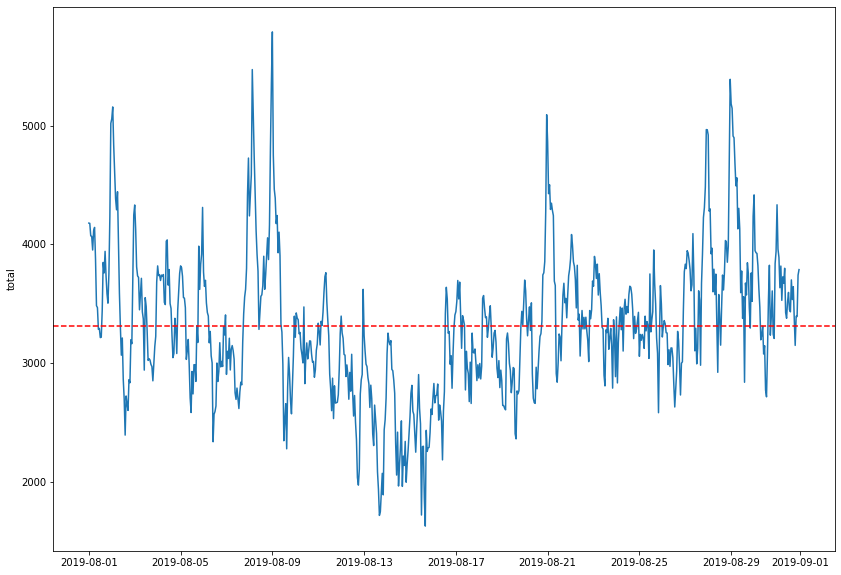

In [20]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_h_aug.index,y='total',data=data_h_aug)
ax=plt.gca()
ax.axhline(data_h_aug['total'].mean(),color='red',linestyle='--')

Text(2019-08-08 00:00:00, 99731.57077034384, 'Maximum usage on 8th aug')

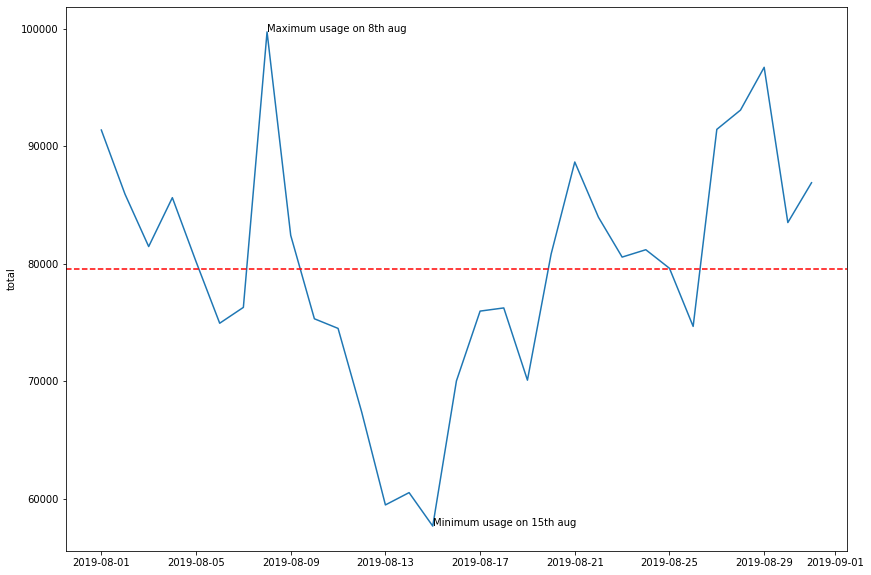

In [21]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_d_aug.index,y='total',data=data_d_aug)
ax=plt.gca()
ax.axhline(data_d_aug['total'].mean(),color='red',linestyle='--')
ax.annotate(xy=(data_d_aug['total'].idxmin(),data_d_aug['total'].min()),text='Minimum usage on 15th aug')
ax.annotate(xy=(data_d_aug['total'].idxmax(),data_d_aug['total'].max()),text='Maximum usage on 8th aug')

# Points to note:
- 15th August recorded the least power consumption
- 8th August had the maximum power consumption
- There has been a dip in the AC usage for the 2nd week of the month after which it is back to normal

# September

In [22]:
data_sep = data_copy['2019-09']
data_h_sep = data_sep.resample('h').sum()
data_d_sep = data_sep.resample('D').sum()

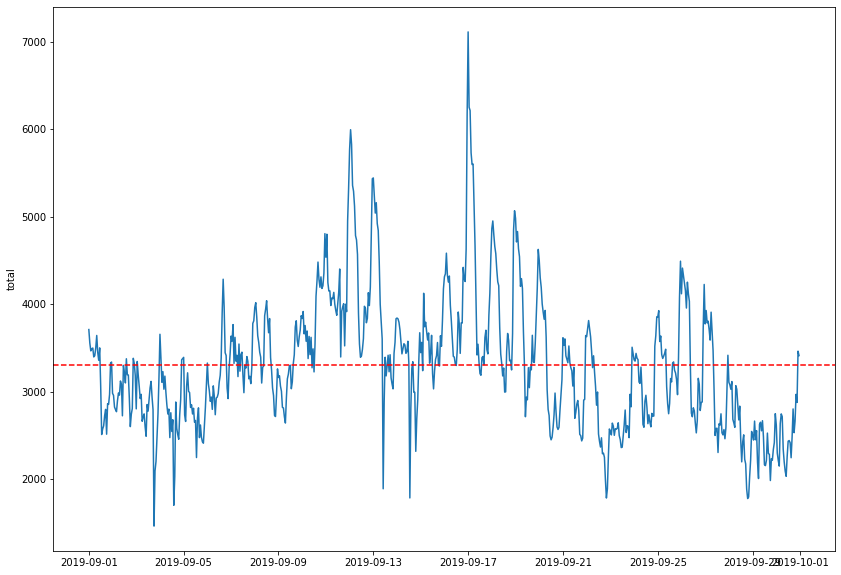

In [23]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_h_sep.index,y='total',data=data_h_sep)
ax=plt.gca()
ax.axhline(data_h_sep['total'].mean(),color='red',linestyle='--')

Text(2019-09-12 00:00:00, 106914.88554925987, 'Maximum usage on 12th sep')

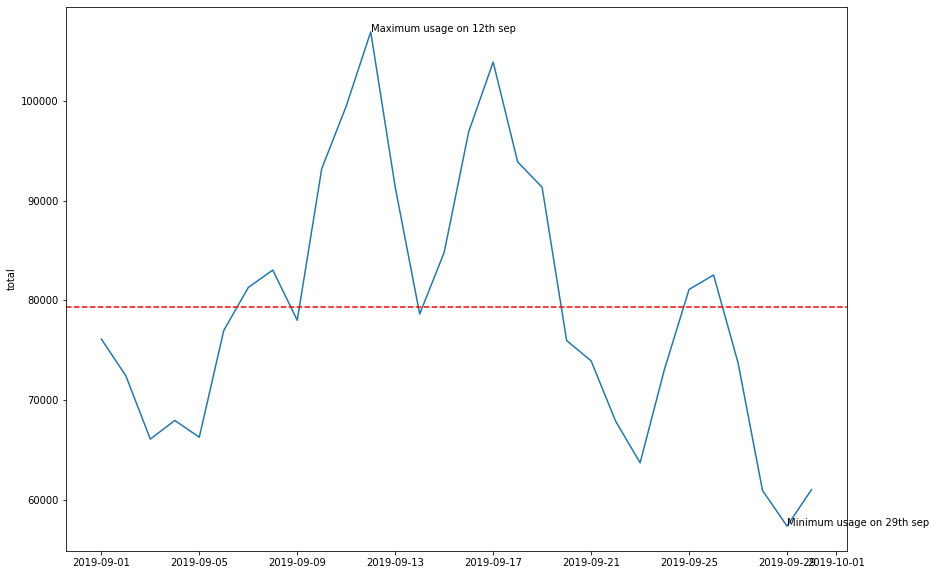

In [24]:
plt.figure(figsize=(14,10))
sns.lineplot(x=data_d_sep.index,y='total',data=data_d_sep)
ax=plt.gca()
ax.axhline(data_d_sep['total'].mean(),color='red',linestyle='--')
ax.annotate(xy=(data_d_sep['total'].idxmin(),data_d_sep['total'].min()),text='Minimum usage on 29th sep')
ax.annotate(xy=(data_d_sep['total'].idxmax(),data_d_sep['total'].max()),text='Maximum usage on 12th sep')

# Points to note
- 29th september recorded the least power usage 
- 12th september recorded the max power usage 
- There was heavy power consumption between 9th and 17th with usage dipping down a bit in the middle of the month and diminishes as the month end nears 

# Q2.) Which AC is most and least used

In [25]:
total_consumption = np.sum(data_copy.drop('total',axis=1)).to_frame().reset_index().rename(columns={'index': 'Ac_model',0: 'power_consumption'})

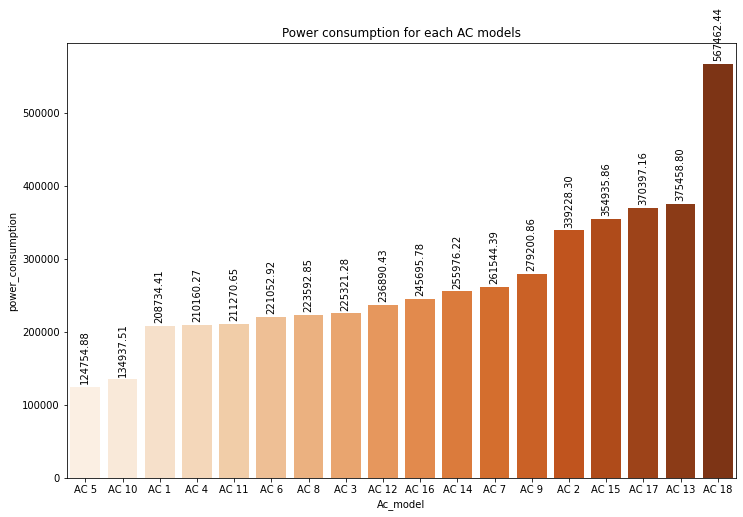

In [26]:
s=total_consumption.sort_values(by='power_consumption')
plt.figure(figsize=(12,8))
plots = sns.barplot(x=total_consumption['Ac_model'],y=total_consumption['power_consumption'],palette='Oranges',order=s['Ac_model'])
plt.title("Power consumption for each AC models")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 30),
                       textcoords='offset points',rotation='vertical')

# Key points:
- AC 5 is least used 
- AC 18 has the highest power consumption

# Comparison to data outside Gurgaon

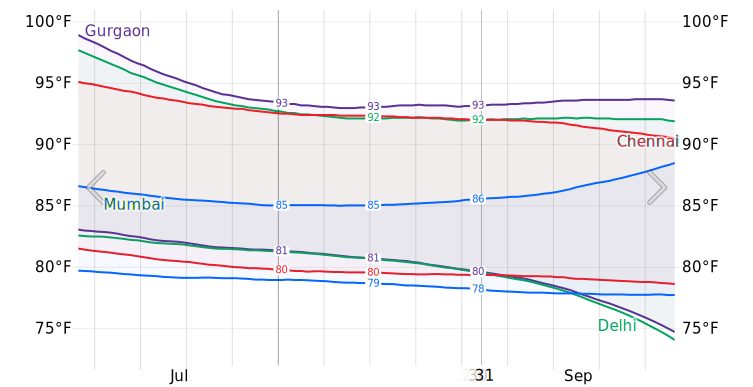

In [27]:
from IPython.display import SVG
SVG(filename='Average High and Low Temperature in August.svg') 

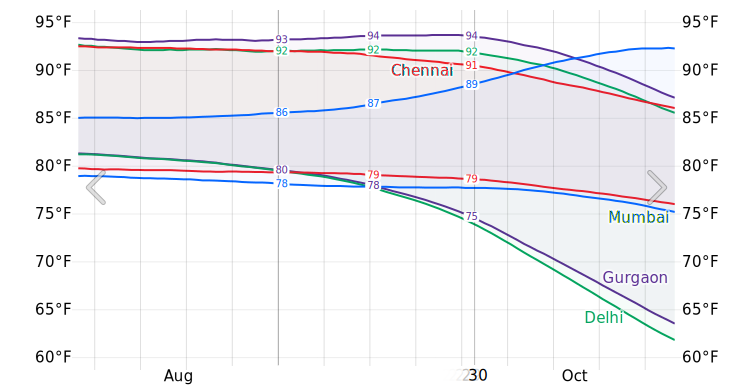

In [28]:
from IPython.display import SVG
SVG(filename='Average High and Low Temperature in September.svg') 

- The above data is taken from "https://weatherspark.com/".
- We observe that gurgaon has the highest min and max temperature among all others and is very closely related to delhi 
- On the other hand Mumbai being closer to sea has more moderate temperature.
- The difference in temperature during the day and night also explains the trend of power consumption in our data

Although I did not download the entire data for comparison, few methods to acquire one are:
- Download the data from the website if their is option (present in this case)
- Use scrapy to scrape the data and store it in preferred format

# Forecasting
Few points to keep in mind before forecasting
 - We forecast on hourly data as with minute interval there is too much noise which does not provide any sense of trend or seasonality
 - We first check for the assumptions of stationary series 
 - Also note that since we have data only for two months, it is impossible to capture any changes which occur with seasons as we will need a lot more data 
 - Hence our aim here is to correctly identify the hourly trend using Sarima and forecast it into the future

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result = adfuller(data_hourly['total'])
result[1]

0.02693994148583487

We have a p value<0.05 , hence we can assume the data to be stationary.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

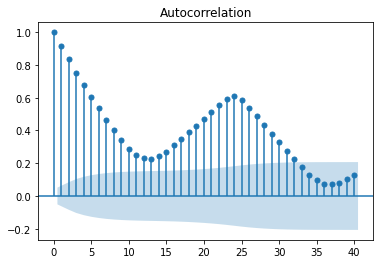

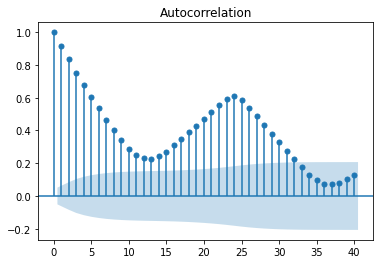

In [32]:
plot_acf(data_hourly['total'],lags=40)

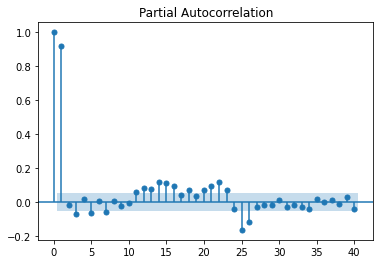

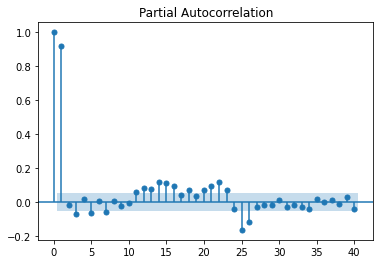

In [33]:
plot_pacf(data_hourly['total'],lags=40)

From above plots we can identify the values for our SARIMAX models 
- p-> 12
- d-> 0 (no need for differencing)
- q-> 2
- P-> 1
- Q-> 1
- D-> 0
- m-> 24 

In [34]:
import statsmodels.api as sm

In [35]:
s_model = sm.tsa.statespace.SARIMAX(data_hourly['total'],order=(12,0,2),seasonal_order=(1,0,1,24))
model_fit = s_model.fit()

C:\Users\Rachit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<AxesSubplot:>

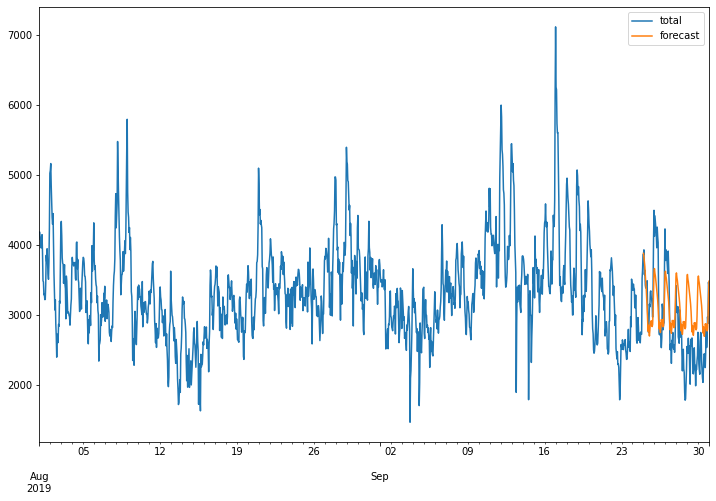

In [36]:
data_hourly['forecast']= model_fit.predict(start='2019-09-25 00:00:00',end= '2019-09-30 23:59:00',dynamic=True)
data_hourly[['total','forecast']].plot(figsize=(12,8))

# Takeaways:
- Our model can accurately detect hourly trend in 24hr cycle
- It also has its limitation as it cannot detect any seasonal change due to months due to lack of information.
- No trend can be seen as well , this is partly due to the fact that we have data collected only for two months that too at minute interval,thus creating a lot of noise in the residuals which masks any trend if present.
- To get better forecast and predictions we must acquire more data